findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

{'replica_id': '1', 'queueing_ratio': '54.13804231630327'}
{'replica_id': '2', 'queueing_ratio': ' 31.375143141732337'}
{'replica_id': '3', 'queueing_ratio': ' 76.26828866988423'}
{'replica_id': '4', 'queueing_ratio': ' 87.08615433378006'}
{'replica_id': '5', 'queueing_ratio': ' 10.936314556829801'}
{'replica_id': '6', 'queueing_ratio': ' 69.83467123731064'}
{'replica_id': '7', 'queueing_ratio': ' 85.9767172010191'}
{'replica_id': '8', 'queueing_ratio': ' 31.292933362438124'}


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

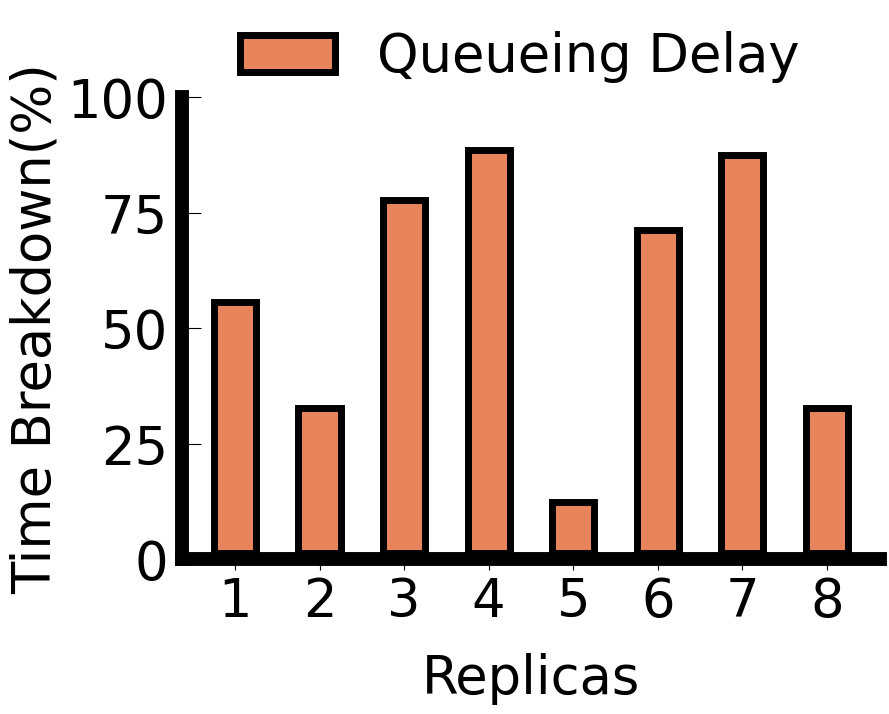

In [2]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

# constants
num_size = 8
num_bars = 1
num_subfigs = 1

queueing_ratio = []

last_replica_id = None
file_path = "./fig2b.csv"
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        print(row)
        replica_id = int(row['replica_id'])
        assert last_replica_id is None or replica_id == last_replica_id + 1
        last_replica_id = replica_id
        queueing_ratio.append(float(row['queueing_ratio']))

# Set font and figure size
font_size = 38
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)

fig_size = (9, 6)
fig, axes = plt.subplots(figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = True
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# settings
colors = ['#e8845c', '#D95319']
labels = {0: 'Queueing Delay', 1: 'Execution Time', 2: 'ours'}

width = 0.1
indexes = [[0.2*i+0.1+width*j for i in range(num_size)] for j in range(num_bars)]

# x-axis setting
x_label = 'Replicas'
x_ticks = []
for i in range(num_size):
    x_ticks.append(sum(indexes[j][i] for j in range(num_bars))/num_bars)
x_ticklabels = [i+1 for i in range(num_size)]

# y-axis setting
y_label = 'Time Breakdown(%)'
y_ticks = np.arange(0, 120, step=25)

axes.set_xlabel(x_label, labelpad=18)
axes.set_xticks(x_ticks)
axes.set_xticklabels(x_ticklabels)

axes.set_ylabel(y_label)
axes.set_ylim(bottom=0, top=100)
axes.set_yticks(y_ticks)
axes.yaxis.set_ticks_position('left')
axes.minorticks_off()
axes.get_yaxis().set_tick_params(direction='in', length=14, pad=10)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

axes.spines['left'].set_linewidth(10)
axes.spines['bottom'].set_linewidth(10)

# Plot bars
bars = [[] for i in range(num_bars)]
bars[0] = axes.bar( indexes[0], queueing_ratio, width, label=labels[0], edgecolor='black', linewidth=5, zorder=3, color = colors[0], bottom=1.4)


fig.legend(handles=[bars[0]], handlelength=1.8, 
           ncol=num_bars, loc='upper center', bbox_to_anchor=(0.5, 1.07), frameon=False, prop={'size':font_size}, columnspacing = 1)

# Plot grid
file_path = './figure2.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)